# Data Profiling

**Import Packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# for feature engineering
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# for preprocessing modelling 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import ExtraTreesClassifier

import warnings
warnings.filterwarnings("ignore")

C:\Users\LENOVO\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**Load Dataset**

In [2]:
# data from titanic is good for learn for basic
df = pd.read_csv("Titanic.csv")

**Preview Dataset**

In [3]:
# view top data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Info Dataset**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


^ Complete data (**entries**) reaches 891 (**0 to 890**), if there is a number below 891, it means that the data has a missing value. How many total missing values ​​are there? can use isna sum

**Check Missing Value**

In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

From here it can be seen that the missing value data is in the **Age**, **Cabin**, and **Embarked** columns.

Data cleansing is not only in missing values, but also in data types (**Dtype**)

^ It can be seen that **Age float64** data, **PassengerId int64** data, coincidentally this titanic data is correct

Sometimes in the original data, we have to change also cover it

For example, it happens a lot, Age data type is Object, we have to change it to numeric first

# Data Cleansing

**Column Age**

<AxesSubplot:ylabel='Frequency'>

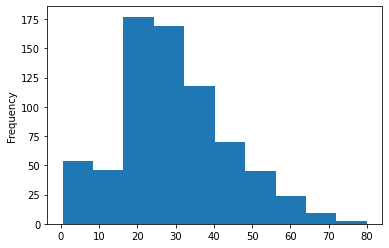

In [6]:
df["Age"].plot(kind="hist")

if you want to clean missing numeric data values, for example **Age**, see first

seen from the distribution of skewness curtosis

here we can use the median

In [7]:
val = df["Age"].median()
df["Age"] = df["Age"].fillna(val)

we recheck the missing value data, especially in Age

In [8]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

^ Already 0, it means that the data in Age is 0, it means that the missing value in Age has been completed

Cabin, categorical data

let's see first

In [9]:
df["Cabin"].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

   * too many uniques, and
   * cabin column is not very influential in predicting the condition of life or death of passengers, as well as
   * it's too dummy, it can only be filled in with type B96 B98, all data is null, imagine 687 empty data, we fill in cabin B89
    
then we better delete the column

In [10]:
df.drop("Cabin", axis = 1, inplace = True) 

^ use True to keep it deleted even if it calls df again

and not only temporarily lost

we try to call back the info data, the **Cabin** data should no longer exist

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


then we check again whether there are still missing values ​​in the data set?

In [12]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

^ there is still missing value data in Embarked
because the data missing value is only 2 and the type is categorical, we can use mode

but we don't fill all missing value data with mode, we can also use new uniq

**Column Embarked**

In [13]:
df["Embarked"] = df.Embarked.fillna("Unknown")

In [14]:
df["Embarked"].value_counts()

S          644
C          168
Q           77
Unknown      2
Name: Embarked, dtype: int64

**Column SibSp and Column Parch**

if we look at the data, the meaning of SibSp is, the person brought a partner or relative?

and for Parch whether the passenger brings parents or not

In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


there will be too many columns if there are SibSp and Parch and also redundant. then you can create a new column

In [16]:
df["Alone"] = df["SibSp"]+df["Parch"]

In [17]:
df["Alone"][df["Alone"]>0] = "With Family"
df["Alone"][df["Alone"]==0]= "Without Family"

In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Without Family
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Without Family


the meaning of the Alone column, if SibSp and Parch are the same 0, it means Without Family

if one of the SibSp or Parch columns is not equal to 0, then With Family

# Exploratory Data Analysis

tell or visualize data from each column

**Describe**

In [19]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


one of the things that can be told from the data described, we can know that the average passenger is 29 years old, the oldest age is 80 years, the minimum is 4 months

the average passenger uses Class 2

**Survived and Non Survived**

In [20]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Survived and Non Survived')

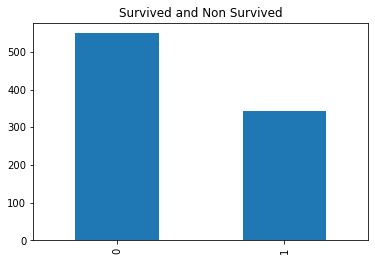

In [21]:
df["Survived"].value_counts().plot(kind = "bar")
plt.title("Survived and Non Survived")

^ still not clear what 0 is and what 1 is

In [22]:
df_survived2 = pd.DataFrame(df["Survived"].value_counts()) # perhatikan tanda kurung
df_survived2["Status"] = ["Dies","Alive"]
df_survived2

,Survived,Status
0,549,Dies
1,342,Alive


<AxesSubplot:xlabel='Status', ylabel='Survived'>

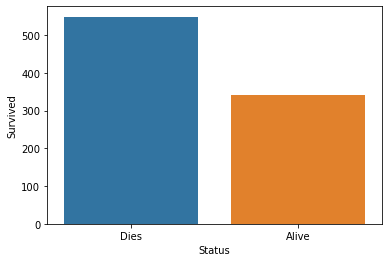

In [23]:
sns.barplot(x = "Status", y = "Survived", data=df_survived2)

^ from here it can be seen that there are more unsaved than unsaved

**Passanger Class**

In [24]:
df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Text(0.5, 1.0, 'Passanger Class')

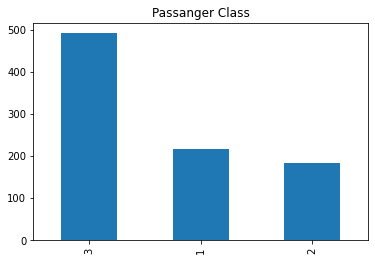

In [25]:
df["Pclass"].value_counts().plot(kind="bar")
plt.title("Passanger Class")

^ from here it can be seen, class 3 users at most

**Alone?**

In [26]:
df["Alone"].value_counts()

Without Family    537
With Family       354
Name: Alone, dtype: int64

Text(0.5, 1.0, 'With Family and Without Family')

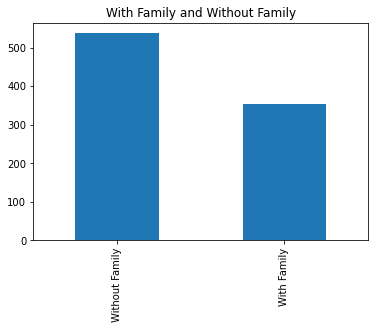

In [27]:
df["Alone"].value_counts().plot(kind="bar")
plt.title("With Family and Without Family")

^ from here you can see that there are more people who don't bring their own families

**Embarked**

In [28]:
df["Embarked"].value_counts()

S          644
C          168
Q           77
Unknown      2
Name: Embarked, dtype: int64

Text(0.5, 1.0, 'Embarked')

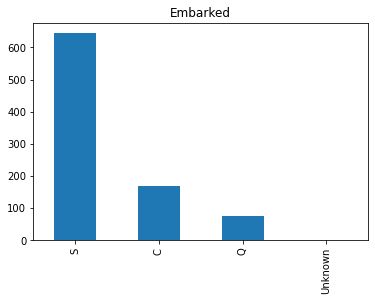

In [29]:
df["Embarked"].value_counts().plot(kind="bar")
plt.title("Embarked")

^ unknow is not empty, but there are 2, it is not visible because there are very few of them

**Correlation**

<AxesSubplot:>

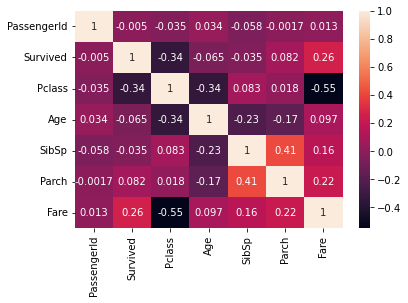

In [30]:
plt.figure(figsize = (6,4))
sns.heatmap(df.corr(), annot = True)

^ there is such a thing as multicollinearity, and one must take down one

Here is an example of a dark color, like Pclass - Fare

And here why is Pclass and Fare multicollinear? because we know, the lower the 1 number (Pclass) the higher the payout (Fare)

The higher the grade number, the cheaper the price

The point is there is a redundant meaning, if both are included in machine learning, then machine learning will be wrong.
So one must be omitted.

Another example, rupiah with dollars. if not one of them is omitted, then the 2 columns show the same thing (assume currency)

# Feature Engineering

transformation for the needs of machine learning models, so machine learning only accepts data in numeric form.

**OneHot Encoding**

for categorical data

**Column Sex**

In [31]:
sex_enc = pd.get_dummies(df["Sex"], prefix = "Sex", drop_first = False)
# prefix function to put words before male or female (prefix words)
# drop first so it doesn't overwrite into one column (so boolean = yes or no)
sex_enc

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


Remove the Sex column (so that the data is not redundant) and add new columns Sex_male and Sex_fmale

In [32]:
df = df.drop(["Sex"], axis = 1)
df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Alone
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,With Family
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,Without Family
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,With Family
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,Without Family
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,S,Without Family
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,S,Without Family
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,W./C. 6607,23.4500,S,With Family
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C,Without Family


In [33]:
df = pd.concat([df, sex_enc], axis=1)
df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Alone,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,With Family,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,With Family,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,Without Family,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,With Family,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,Without Family,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,S,Without Family,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,S,Without Family,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,W./C. 6607,23.4500,S,With Family,1,0
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C,Without Family,0,1


^ appears a new column on the far right

for what purpose? to make the machine smarter

cake for example the joni girl? no. oh man? yes. okay

**Column Embarked**

In [34]:
embarked_enc = pd.get_dummies(df["Embarked"], prefix = "Embarked", drop_first = False)
df = df.drop(["Embarked"], axis = 1)
df = pd.concat([df, embarked_enc], axis=1)

In [35]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Alone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_Unknown
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,With Family,0,1,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,With Family,1,0,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,Without Family,1,0,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,With Family,1,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,Without Family,0,1,0,0,1,0


**Column Alone**

In [36]:
alone_enc = pd.get_dummies(df["Alone"], prefix = "Alone", drop_first = False)
df = df.drop(["Alone"], axis = 1)
df = pd.concat([df, alone_enc], axis=1)

In [37]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_Unknown,Alone_With Family,Alone_Without Family
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,0,1,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,1,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,0,0,1,0,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,0,0,1,0,0,1


### Untuk ordinal menggunakan map

**Column Pclass**

In [38]:
df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [39]:
df["Pclass"] = df["Pclass"].map({1:0, 2:1, 3:2}) 
# tergantung datanya, dan tergantung pengetahuan kita
# kalo disini, kelas 1 yang paling tinggi, paling premium
# lalu yang paling rendah kelas 3 

In [40]:
df["Pclass"].value_counts()

2    491
0    216
1    184
Name: Pclass, dtype: int64

### Standard Scaler

in the distribution there is a normal distribution, so this stardard scaler normalizes the distribution

what is the purpose of the standard scaler? first to lighten the performance of the machine to learn. not too far between the distance

For example, the smallest fare is 0, the largest is 500s, so the machine will be difficult to learn. to make it easier for machines to learn the data distribution is normalized first using a standard scaler

Then why is there a minus number? it doesn't matter. it does have a formula, it's just a transformation, it doesn't change the meaning

In [41]:
scaller = StandardScaler()

In [42]:
df[["Age"]] = scaller.fit_transform(df[["Age"]])

In [43]:
df[["Fare"]] = scaller.fit_transform(df[["Fare"]])

In [44]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_Unknown,Alone_With Family,Alone_Without Family
0,1,0,2,"Braund, Mr. Owen Harris",-0.565736,1,0,A/5 21171,-0.502445,0,1,0,0,1,0,1,0
1,2,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.663861,1,0,PC 17599,0.786845,1,0,1,0,0,0,1,0
2,3,1,2,"Heikkinen, Miss. Laina",-0.258337,0,0,STON/O2. 3101282,-0.488854,1,0,0,0,1,0,0,1
3,4,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.433312,1,0,113803,0.420730,1,0,0,0,1,0,1,0
4,5,0,2,"Allen, Mr. William Henry",0.433312,0,0,373450,-0.486337,0,1,0,0,1,0,0,1


# Preprocessing Modelling

why is there preprocessing modeling? as the name implies, before modeling make sure the data is really ready, process it first

* **Feature Selection**

In [45]:
df.drop("Name", axis=1, inplace=True) # too unique
# terlalu unique, terlalu banyak data. tidak berpola. tidak ada pengaruh nama dengan selamat atau tidaknya

In [46]:
df.drop("Ticket", axis=1, inplace=True) # too unique
# serial number, terlalu unique juga

In [47]:
df.drop("Fare", axis=1, inplace=True) # multicolinear
# multicolinear dengan pclass, meaning-nya mirip mirip dengan Pclass
# bisa apus Pclass, Fare dibiarin juga gpp

In [48]:
df.drop("PassengerId", axis=1, inplace=True) # identifier
# kalo ga di ilangin sama aja ngasih kunci jawaban ke mesin. kalo yg ID nya ini selamat apa ga
# contoh lain soal 1 jawabanya a, soal 2 jawabanya c, soal 3 jawabanya b

* **Feature Importance**

after being dropped, distinguish between fX and fy

X is training data or questions x = age, gender, embarked

y is answer data (answer key)

y = 22 years old, male, destination shouthampton

so he can learn, oh this is life, oh this is not life

In [49]:
X = df.drop(["Survived"], axis = 1) 
# is not inplaced True so that it can be returned again, can be called again
# if the inplace is True, the column will be deleted and can't test the engine
y = df["Survived"]

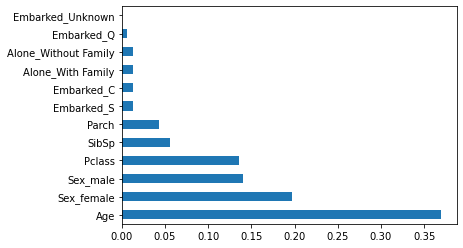

In [50]:
model = ExtraTreesClassifier() # with this Extra, he can know whether the passenger survived or not, there is an algorithm behind it
model.fit(X,y)

feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance.nlargest(23).plot(kind = "barh")
plt.show()

^ after using Extra earlier, you can see who determines whether or not you are safe from

1. age
2. female gender
3. Class 1 should be because the fees are expensive

* **Train Test Split**

like a test, we are given training data (_train) and given test data (_test)

randomly selected (random state) sklearn library

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)
# random state so that the results are the same